Code for the hybrid model used for classification images. You can uncomment it and run it once. The model will be saved to a .h5 file which makes it easier to use in the future.

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import backend as K

# # Clear Keras session to release memory
# K.clear_session()

# # If you're using TensorFlow, you can also clear GPU memory using the following:

# # Get the current TensorFlow session and close it
# session = tf.compat.v1.Session()
# session.close()

# # Reinitialize the session after clearing memory
# tf.compat.v1.reset_default_graph()

# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import random
# import pywt

# from tensorflow.keras import layers, models
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.regularizers import l2
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf
# from sklearn.utils import shuffle

# # Load all images from REAL and FAKE directories
# def load_balanced_images_from_directory(real_dir, fake_dir, label_real=0, label_fake=1, image_size=(32, 32)):
#     real_images, fake_images = [], []

#     # Load REAL images
#     real_filenames = os.listdir(real_dir)
#     random.shuffle(real_filenames)
#     for filename in real_filenames:
#         img_path = os.path.join(real_dir, filename)
#         image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         if image is not None:
#             image = cv2.resize(image, image_size)  # Resize image
#             image = image / 255.0  # Normalize
#             real_images.append(image)

#     # Load FAKE images
#     fake_filenames = os.listdir(fake_dir)
#     random.shuffle(fake_filenames)
#     for filename in fake_filenames:
#         img_path = os.path.join(fake_dir, filename)
#         image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         if image is not None:
#             image = cv2.resize(image, image_size)  # Resize image
#             image = image / 255.0  # Normalize
#             fake_images.append(image)

#     images = np.array(real_images + fake_images)
#     labels = np.array([label_real] * len(real_images) + [label_fake] * len(fake_images))

#     return images, labels

# # Extract wavelet features from an image
# def extract_wavelet_features(image, wavelet='bior1.3'):
#     coeffs2 = pywt.dwt2(image, wavelet)
#     LL, (LH, HL, HH) = coeffs2  # Decompose into 4 sub-bands (LL, LH, HL, HH)

#     # Flatten each coefficient and concatenate them into a feature vector
#     LL_flat = LL.flatten()
#     LH_flat = LH.flatten()
#     HL_flat = HL.flatten()
#     HH_flat = HH.flatten()

#     features = np.concatenate([LL_flat, LH_flat, HL_flat, HH_flat])

#     return features

# # Extract wavelet features and stack them for multiple images
# def extract_features_and_stack(images, wavelet='bior1.3'):
#     all_features = []
#     for image in images:
#         features = extract_wavelet_features(image, wavelet)
#         all_features.append(features)

#     stacked_features = np.vstack(all_features)
#     return stacked_features
# from tensorflow.keras import layers, models
# from tensorflow.keras.models import Model

# def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1)):
#     """
#     A simple residual block with a skip connection.
#     """
#     shortcut = x
#     x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)

#     # Adding the skip connection (residual)
#     x = layers.add([x, shortcut])

#     return x

# def create_resnet_hybrid_model(input_shape_cnn, input_shape_wavelet):
#     """
#     This function creates a more complex CNN + wavelet hybrid model with ResNet-like architecture.
#     """
#     # CNN Branch (ResNet-like)
#     cnn_input = layers.Input(shape=input_shape_cnn)
#     x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(cnn_input)
#     x = layers.BatchNormalization()(x)

#     # Add multiple residual blocks to form a deeper model
#     for _ in range(3):  # 3 residual blocks
#         x = residual_block(x, 32)

#     x = layers.MaxPooling2D((2, 2))(x)

#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)

#     for _ in range(3):  # 3 more residual blocks
#         x = residual_block(x, 64)

#     x = layers.MaxPooling2D((2, 2))(x)

#     x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)

#     for _ in range(3):  # 3 more residual blocks
#         x = residual_block(x, 128)

#     x = layers.MaxPooling2D((2, 2))(x)

#     cnn_output = layers.Flatten()(x)

#     # Wavelet Branch (Fully connected)
#     wavelet_input = layers.Input(shape=input_shape_wavelet)
#     wavelet_output = layers.Dense(128, activation='relu')(wavelet_input)
#     wavelet_output = layers.BatchNormalization()(wavelet_output)
#     wavelet_output = layers.Dense(64, activation='relu')(wavelet_output)

#     # Combine CNN and wavelet features
#     combined = layers.concatenate([cnn_output, wavelet_output])

#     # Fully connected layers after concatenation
#     combined_output = layers.Dense(64, activation='relu')(combined)
#     combined_output = layers.Dense(32, activation='relu')(combined_output)
#     combined_output = layers.Dense(1, activation='sigmoid')(combined_output)  # Sigmoid for binary classification

#     # Final model
#     model = Model(inputs=[cnn_input, wavelet_input], outputs=combined_output)

#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     return model
# def split_data(images, wavelet_features, labels, train_split=0.8):
#     images, wavelet_features, labels = shuffle(images, wavelet_features, labels, random_state=42)
#     split_idx = int(len(images) * train_split)
#     train_images = images[:split_idx]
#     train_wavelet = wavelet_features[:split_idx]
#     train_labels = labels[:split_idx]
#     val_images = images[split_idx:]
#     val_wavelet = wavelet_features[split_idx:]
#     val_labels = labels[split_idx:]
#     return (train_images, train_wavelet, train_labels), (val_images, val_wavelet, val_labels)

# # Load images from REAL and FAKE directories
# real_dir = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/train/REAL'  # Replace with your 'REAL' images directory
# fake_dir = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/train/FAKE'  # Replace with your 'FAKE' images directory

# images, labels = load_balanced_images_from_directory(real_dir, fake_dir)
# stacked_wavelet_features = extract_features_and_stack(images)

# cnn_input_images = images.reshape(images.shape[0], 32, 32, 1)
# input_shape_cnn = cnn_input_images.shape[1:]
# input_shape_wavelet = (stacked_wavelet_features.shape[1],)

# (train_images, train_wavelet, train_labels), (val_images, val_wavelet, val_labels) = split_data(
#     cnn_input_images, stacked_wavelet_features, labels
# )

# # Create model
# model = create_resnet_hybrid_model(input_shape_cnn, input_shape_wavelet)

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
# # Train model
# history = model.fit(
#     [train_images, train_wavelet],
#     train_labels,
#     epochs=20,
#     batch_size=128,
#     validation_data=([val_images, val_wavelet], val_labels),
#     callbacks=[early_stopping, reduce_lr]
# )

# # Evaluate the model
# test_loss, test_acc = model.evaluate([val_images, val_wavelet], val_labels)
# print(f'Test accuracy: {test_acc:.4f}')

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# # Loss plot
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Accuracy plot
# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Train Accuracy')  # For accuracy, use 'accuracy' key
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # For validation accuracy
# plt.title('Accuracy vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()
# # Load the test set from 'REAL' and 'FAKE' directories for testing
# real_dir_test = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/test/REAL'  # Replace with your 'REAL' test images directory
# fake_dir_test = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/test/FAKE'  # Replace with your 'FAKE' test images directory

# # Load test images and labels
# test_images, test_labels = load_balanced_images_from_directory(real_dir_test, fake_dir_test)

# # Extract wavelet features for the test set
# stacked_wavelet_features_test = extract_features_and_stack(test_images)

# # Reshape CNN input (test images) and wavelet input (test features)
# cnn_input_images_test = test_images.reshape(test_images.shape[0], 32, 32, 1)  # Add channel dimension for CNN
# wavelet_input_features_test = stacked_wavelet_features_test  # These are the wavelet features already stacked

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate([cnn_input_images_test, wavelet_input_features_test], test_labels)

# print(f'Test accuracy: {test_acc:.4f}')

# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Get predictions for the test set
# test_predictions = model.predict([cnn_input_images_test, wavelet_input_features_test])
# sns.displot(test_predictions)

# test_predictions = (test_predictions > 0.5).astype(int)

# # Confusion matrix and classification report
# test_predictions = model.predict([cnn_input_images_test, stacked_wavelet_features_test])
# test_predictions_binary = (test_predictions > 0.5).astype(int)

# conf_matrix = confusion_matrix(test_labels, test_predictions_binary)
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

# # Classification report
# print("\nClassification Report:")
# print(classification_report(test_labels, test_predictions_binary))

# # Load the test set from 'REAL' and 'FAKE' directories for testing
# real_dir_test = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/test/REAL'  # Replace with your 'REAL' test images directory
# fake_dir_test = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/test/FAKE'  # Replace with your 'FAKE' test images directory

# # Load test images and labels with grayscale conversion
# def load_images_grayscale_from_directory(real_dir, fake_dir, label_real=0, label_fake=1, image_size=(32, 32)):
#     real_images, fake_images = [], []

#     # Load REAL images
#     real_filenames = os.listdir(real_dir)
#     random.shuffle(real_filenames)
#     for filename in real_filenames:
#         img_path = os.path.join(real_dir, filename)
#         image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
#         if image is not None:
#             image = cv2.resize(image, image_size)  # Resize image
#             image = image / 255.0  # Normalize
#             real_images.append(image)

#     # Load FAKE images
#     fake_filenames = os.listdir(fake_dir)
#     random.shuffle(fake_filenames)
#     for filename in fake_filenames:
#         img_path = os.path.join(fake_dir, filename)
#         image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
#         if image is not None:
#             image = cv2.resize(image, image_size)  # Resize image
#             image = image / 255.0  # Normalize
#             fake_images.append(image)

#     images = np.array(real_images + fake_images)
#     labels = np.array([label_real] * len(real_images) + [label_fake] * len(fake_images))

#     return images, labels

# # Load test images and labels in grayscale
# test_images, test_labels = load_images_grayscale_from_directory(real_dir_test, fake_dir_test)

# # Extract wavelet features for the test set
# stacked_wavelet_features_test = extract_features_and_stack(test_images)

# # Reshape CNN input (test images) and wavelet input (test features)
# cnn_input_images_test = test_images.reshape(test_images.shape[0], 32, 32, 1)  # Add channel dimension for CNN
# wavelet_input_features_test = stacked_wavelet_features_test  # These are the wavelet features already stacked

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate([cnn_input_images_test, wavelet_input_features_test], test_labels)
# print(f'Test accuracy: {test_acc:.4f}')

# # Get predictions for the test set
# test_predictions = model.predict([cnn_input_images_test, wavelet_input_features_test])

# # Convert predictions to binary (REAL: 0, FAKE: 1)
# test_predictions_binary = (test_predictions > 0.5).astype(int)

# # Confusion matrix and classification report
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Confusion Matrix
# conf_matrix = confusion_matrix(test_labels, test_predictions_binary)
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

# # Classification Report
# print("\nClassification Report:")
# print(classification_report(test_labels, test_predictions_binary))

# plt.imshow(images[0])
# model.summary()
# model.save('hybrid_resnet_wavelet_model_new.h5')
# print("Model saved successfully!")

Importing the dataset from kaggle.

In [2]:
import kagglehub
birdy654_cifake_real_and_ai_generated_synthetic_images_path = kagglehub.dataset_download('birdy654/cifake-real-and-ai-generated-synthetic-images')
!mv /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images /content

100%|██████████| 105M/105M [00:01<00:00, 104MB/s] 

Extracting files...


Loading the pre-trained and savd model from the .h5 file.

In [17]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("/content/drive/MyDrive/hybrid_resnet_wavelet_model.h5")

# Check the architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 32)     │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 32)     │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 32)     │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 32)     │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 32)     │              0 │ batch_normalization_2… │
│                           │                        │                │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 32)     │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 32)     │            128 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 32, 32, 32)     │              0 │ batch_normalization_4… │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 32, 32)     │            128 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)    

 Total params: 1,573,635 (6.00 MB)

 Trainable params: 1,570,241 (5.99 MB)

 Non-trainable params: 3,392 (13.25 KB)

 Optimizer params: 2 (12.00 B)

Installing the necessary library for wavelet transforms.

In [7]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.6 MB/s eta 0:00:00


Some functions from the model to load images and do the wavelet transform. This will be used by gradcam for processing the input and outputs.

In [8]:
import os
def load_balanced_images_from_directory(real_dir, fake_dir, label_real=0, label_fake=1, image_size=(32, 32)):
    real_images, fake_images = [], []
    real_paths, fake_paths = [], []  # Store file paths

    # Load REAL images
    real_filenames = os.listdir(real_dir)
    random.shuffle(real_filenames)
    for filename in real_filenames:
        img_path = os.path.join(real_dir, filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, image_size)  # Resize image
            image = image / 255.0  # Normalize
            real_images.append(image)
            real_paths.append(img_path)  # Store file path

    # Load FAKE images
    fake_filenames = os.listdir(fake_dir)
    random.shuffle(fake_filenames)
    for filename in fake_filenames:
        img_path = os.path.join(fake_dir, filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, image_size)  # Resize image
            image = image / 255.0  # Normalize
            fake_images.append(image)
            fake_paths.append(img_path)  # Store file path

    images = np.array(real_images + fake_images)
    labels = np.array([label_real] * len(real_images) + [label_fake] * len(fake_images))
    paths = np.array(real_paths + fake_paths)  # Combine paths

    return images, labels, paths

# Extract wavelet features from an image
def extract_wavelet_features(image, wavelet='bior1.3'):
    coeffs2 = pywt.dwt2(image, wavelet)
    LL, (LH, HL, HH) = coeffs2  # Decompose into 4 sub-bands (LL, LH, HL, HH)

    # Flatten each coefficient and concatenate them into a feature vector
    LL_flat = LL.flatten()
    LH_flat = LH.flatten()
    HL_flat = HL.flatten()
    HH_flat = HH.flatten()

    features = np.concatenate([LL_flat, LH_flat, HL_flat, HH_flat])

    return features

# Extract wavelet features and stack them for multiple images
def extract_features_and_stack(images, wavelet='bior1.3'):
    all_features = []
    for image in images:
        features = extract_wavelet_features(image, wavelet)
        all_features.append(features)

    stacked_features = np.vstack(all_features)
    return stacked_features
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pywt

# Load the test set from 'REAL' and 'FAKE' directories for testing
real_dir_test = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/test/REAL'  # Replace with your 'REAL' test images directory
fake_dir_test = '/content/cifake-real-and-ai-generated-synthetic-images/versions/3/test/FAKE'  # Replace with your 'FAKE' test images directory

# Load test images and labels
# test_images, test_labels = load_balanced_images_from_directory(real_dir_test, fake_dir_test)
test_images, test_labels, test_paths = load_balanced_images_from_directory(real_dir_test, fake_dir_test)

# Extract wavelet features for the test set
stacked_wavelet_features_test = extract_features_and_stack(test_images)

# Reshape CNN input (test images) and wavelet input (test features)
cnn_input_images_test = test_images.reshape(test_images.shape[0], 32, 32, 1)  # Add channel dimension for CNN
wavelet_input_features_test = stacked_wavelet_features_test  # These are the wavelet features already stacked


Index of the image to which grad-cam is applied. Index less than 10000 is REAL and others are FAKE.

In [13]:
ind=13999

Meta-data about the image, it's label and path for verification.

In [15]:
print(test_images[ind], test_labels[ind], test_paths[ind] )

[[0.27843137 0.28235294 0.36078431 ... 0.31372549 0.29803922 0.31764706]
 [0.35294118 0.2745098  0.31372549 ... 0.30196078 0.29803922 0.32156863]
 [0.3254902  0.27058824 0.3254902  ... 0.29411765 0.29803922 0.3254902 ]
 ...
 [0.28235294 0.32941176 0.33333333 ... 0.29803922 0.30196078 0.34117647]
 [0.28627451 0.30980392 0.31764706 ... 0.29803922 0.32156863 0.3254902 ]
 [0.31372549 0.34509804 0.29019608 ... 0.32156863 0.34117647 0.28235294]] 1 /content/cifake-real-and-ai-generated-synthetic-images/versions/3/test/FAKE/479 (6).jpg


GRADCAM of the image at the given index. It outputs a heatmap with red indicating the region and features which contributed the most to determining the label along with their position in terms of a 3x3 grid.

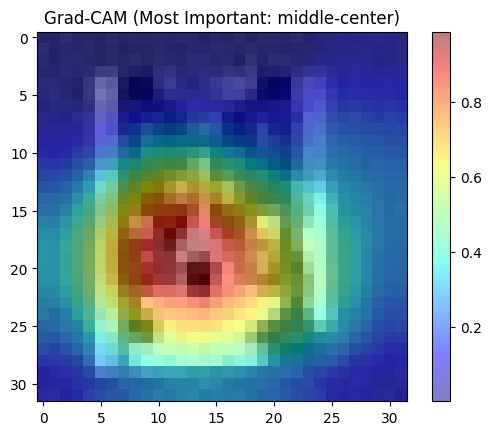

The most important region is: middle-center


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Select last convolution layer for Grad-CAM
layer_name = "conv2d_20"
target_layer = model.get_layer(name=layer_name)

# Define a Grad-CAM function
grad_model = tf.keras.models.Model(
    inputs=[model.input],
    outputs=[target_layer.output, model.output]
)

# Compute Grad-CAM
with tf.GradientTape() as tape:
    inputs = np.expand_dims(cnn_input_images_test[ind], axis=0)  # Example image
    inputs_wavelet = np.expand_dims(wavelet_input_features_test[ind], axis=0)
    inputs_tensor = tf.convert_to_tensor(inputs, dtype=tf.float32)
    tape.watch(inputs_tensor)

    conv_outputs, predictions = grad_model([inputs, inputs_wavelet])
    loss = predictions[0]

grads = tape.gradient(loss, conv_outputs)[0]
weights = tf.reduce_mean(grads, axis=(0, 1))

# Create Grad-CAM heatmap
cam = np.zeros(conv_outputs.shape[0:2], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * conv_outputs[..., i]
cam = np.maximum(cam, 0)  # ReLU
cam /= np.max(cam)  # Normalize
cam = np.squeeze(cam)
cam = cv2.resize(cam, (32, 32), interpolation=cv2.INTER_LINEAR)

# Divide the heatmap into a 3x3 grid and calculate the importance of each region
grid_size = 3
region_importance = np.zeros((grid_size, grid_size))

# Calculate the size of each region
region_height = cam.shape[0] // grid_size
region_width = cam.shape[1] // grid_size

for i in range(grid_size):
    for j in range(grid_size):
        region = cam[
            i * region_height: (i + 1) * region_height,
            j * region_width: (j + 1) * region_width
        ]
        region_importance[i, j] = np.sum(region)

# Find the region with the maximum importance
max_region_index = np.unravel_index(np.argmax(region_importance), region_importance.shape)
region_names = [
    ["top-left", "top-center", "top-right"],
    ["middle-left", "middle-center", "middle-right"],
    ["bottom-left", "bottom-center", "bottom-right"],
]
most_important_region = region_names[max_region_index[0]][max_region_index[1]]

# Display Grad-CAM and print the most important region
plt.imshow(cnn_input_images_test[ind].squeeze(), cmap='gray')  # Original image
plt.imshow(cam, cmap='jet', alpha=0.5)  # Grad-CAM overlay
plt.colorbar()
plt.title(f"Grad-CAM (Most Important: {most_important_region})")
plt.show()

print(f"The most important region is: {most_important_region}")


Plotting the image before GRADCAM for comparison purposes.

Shape of cam: (32, 32)
pred tf.Tensor([0.9896966], shape=(1,), dtype=float32)


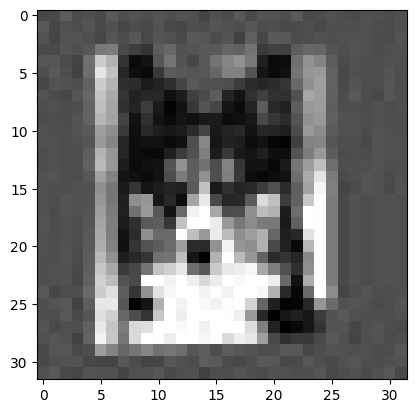

In [16]:
plt.imshow(cnn_input_images_test[ind].squeeze(), cmap='gray')  # Original image
# plt.savefig("gradcam_output.png", format="png") #To save the image
# Additional details for sanity-check.
print("Shape of cam:", cam.shape)
print("pred",predictions[0])

Another explainability tool : SHAP. However, its outputs are not at par with gradcam. Pink indicates features or regions contributing the most to the prediction of the predicted label and blue indicates regions contributing to the prediction of the other label. In many of the outputs we see a mix of blue and pink which is hard to interpret.

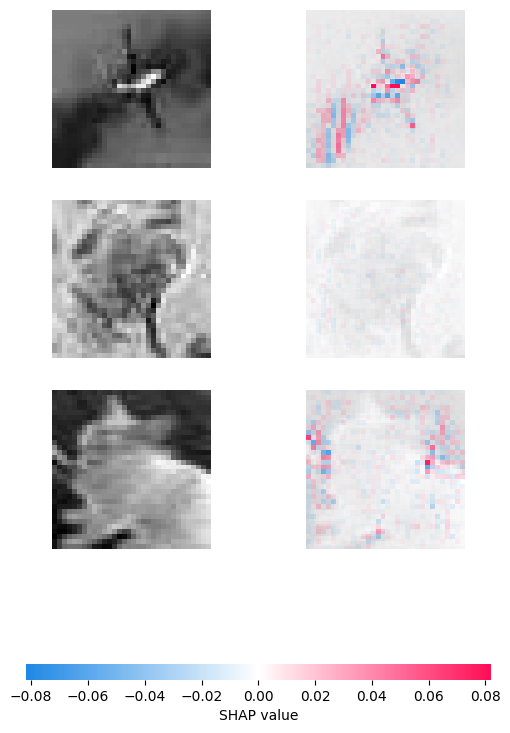

In [10]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, [cnn_input_images_test, wavelet_input_features_test])

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values([cnn_input_images_test[3:6], wavelet_input_features_test[3:6]])
shap_values_cnn = shap_values[0]
shap.image_plot(shap_values_cnn, -cnn_input_images_test[3:6])

In [ ]:
print(test_labels[0:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


SHAP outputs for REAL images below and FAKE images above.

In [ ]:
print(test_labels[10000:11000])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

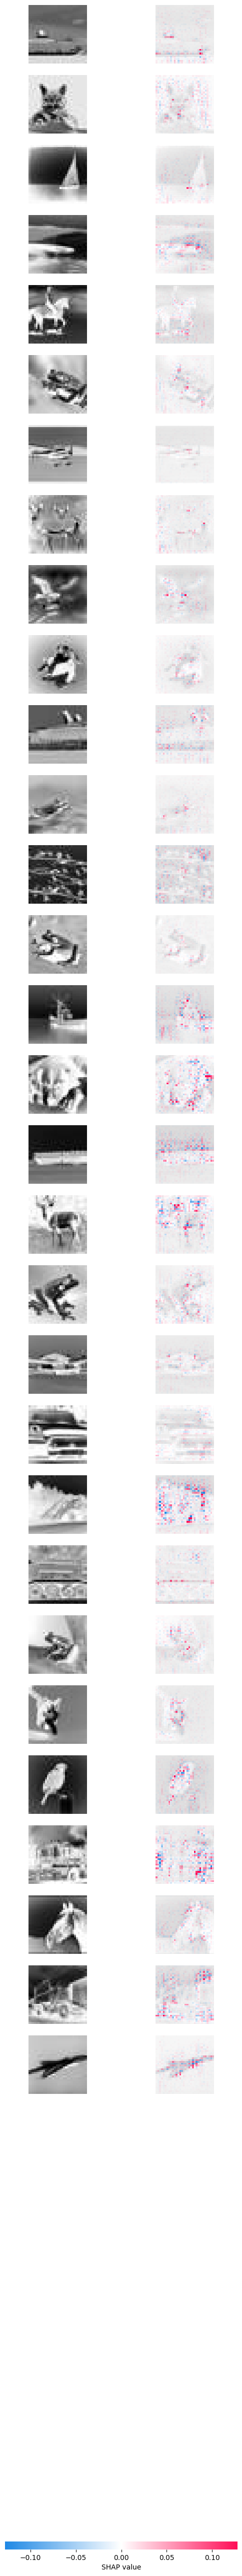

In [ ]:
shap_values = explainer.shap_values([cnn_input_images_test[10000:10030], wavelet_input_features_test[10000:10030]])
shap_values_cnn = shap_values[0]
shap.image_plot(shap_values_cnn, -cnn_input_images_test[10000:10030])